In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def cal_d1(S,K,sigma,T,r):
    d1 = (np.log(S/K) + (r+ (0.5 * (sigma)**2) )*T) / (sigma * np.sqrt(T))
    return d1

In [3]:
def cal_d2(d1, sigma,T):
    d2 = d1 - (sigma * (np.sqrt(T)))
    return d2

In [4]:
from scipy.stats import norm
import math
def cal_C(S,K, d1,d2,r,T):
    """
    S = Current stock price
    K = Strike price 
    T = Time to maturity (in years) 
    r = Risk-free interest rate 
    σ = Volatility of the stock 
    N(d) = Cumulative distribution function (CDF) of the standard normal distribution
    """
    c = S * norm.cdf(d1) - K * math.exp(- r  * T) * norm.cdf(d2)

    return c

In [5]:
here_d1= cal_d1(60,56,0.3,0.5,0.14)
print(here_d1)

0.7612846969447399


In [6]:
here_d2 = cal_d2(here_d1, 0.3,0.5)
here_d2

0.5491526625887756

In [7]:
c_val = cal_C(60,56,here_d1,here_d2,0.14,0.5)

In [8]:
c_val

9.60913887372783

In [9]:
def compute_Black_Scholes_Option_Pricing_Model(S,K,r,T,sigma):
    here_d1 = cal_d1(S,K,sigma,T,r)
    here_d2 = cal_d2(here_d1, sigma,T)
    c_val = cal_C(S,K, here_d1,here_d2,r,T)

    return c_val

In [10]:
c_val = compute_Black_Scholes_Option_Pricing_Model(60,56,0.14,0.5,0.3)

In [11]:
c_val

9.60913887372783

In [12]:
variation_vol = np.arange(0.1, 0.6, 0.1)

In [13]:
variation_vol

array([0.1, 0.2, 0.3, 0.4, 0.5])

In [14]:
val_variations = []

for var in variation_vol:
    temp_c_val = compute_Black_Scholes_Option_Pricing_Model(60,56,0.14,0.5,var)
    val_variations.append(temp_c_val)

In [15]:
val_variations

[7.822753913421124,
 8.46621414492224,
 9.60913887372783,
 10.94339920921135,
 12.35893254464969]

In [16]:
variation_T = np.arange(0.1,2.1, 0.1)

In [17]:
T_variations = []

for T in variation_T:
    temp_c_val = compute_Black_Scholes_Option_Pricing_Model(60,56,0.14,T,0.3)
    T_variations.append(temp_c_val)

T_variations

[5.3523436059603,
 6.598664019842751,
 7.689492527404234,
 8.6833079963654,
 9.60913887372783,
 10.48349259225845,
 11.316762465048804,
 12.115981207773139,
 12.886167219754533,
 13.631050468250208,
 14.353494249111762,
 15.05575504225795,
 15.73965034287766,
 16.406671335504086,
 17.058061024736624,
 17.694869919417933,
 18.317996664967378,
 18.928218305033543,
 19.526213226910166,
 20.11257883718394]

In [18]:
int_variations = np.arange(0.01, 0.11, 0.01)

In [19]:
int_variations

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ])

In [20]:
interest_variations = []

for inte in int_variations:
    temp_c_val = compute_Black_Scholes_Option_Pricing_Model(60,56,inte,0.5,0.3)
    interest_variations.append(temp_c_val)

interest_variations

[7.3201864357995845,
 7.487056067932336,
 7.655602926067537,
 7.825789817382386,
 7.99757870389854,
 8.170930752066702,
 8.345806383176885,
 8.522165324473981,
 8.699966660858252,
 8.879168887049723]

In [21]:
df_interest = pd.DataFrame()

In [22]:
df_interest['Interest Variation'] = interest_variations

In [23]:
df_interest

,Interest Variation
0,7.320186
1,7.487056
2,7.655603
3,7.825790
4,7.997579
5,8.170931
6,8.345806
7,8.522165
8,8.699967
9,8.879169


In [24]:
df_interest['Interest rate'] = int_variations

In [25]:
df_interest

,Interest Variation,Interest rate
0,7.320186,0.01
1,7.487056,0.02
2,7.655603,0.03
3,7.825790,0.04
4,7.997579,0.05
5,8.170931,0.06
6,8.345806,0.07
7,8.522165,0.08
8,8.699967,0.09
9,8.879169,0.10


In [26]:
df_volatality = pd.DataFrame()

In [27]:
df_volatality['Volatility Variation'] = variation_vol

In [28]:
df_volatality['Variation with volatility'] = val_variations

In [29]:
df_volatality

,Volatility Variation,Variation with volatility
0,0.1,7.822754
1,0.2,8.466214
2,0.3,9.609139
3,0.4,10.943399
4,0.5,12.358933


In [30]:
df_time = pd.DataFrame()

In [31]:
df_time['Year Variation'] = variation_T
df_time['Value Variations'] = T_variations

In [32]:
df_time

,Year Variation,Value Variations
0,0.1,5.352344
1,0.2,6.598664
2,0.3,7.689493
3,0.4,8.683308
4,0.5,9.609139
5,0.6,10.483493
6,0.7,11.316762
7,0.8,12.115981
8,0.9,12.886167
9,1.0,13.631050


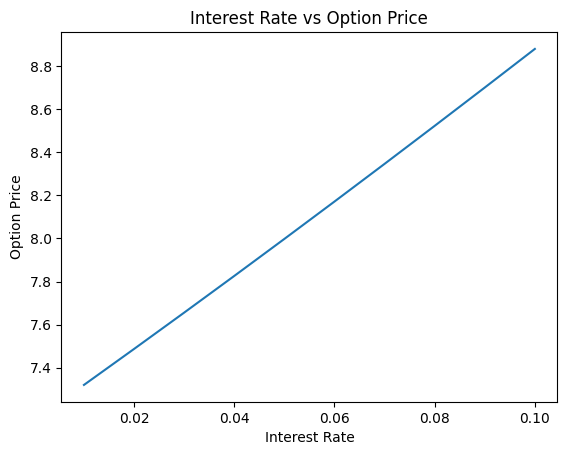

In [33]:
#Plotting the graph for interest rate
plt.plot(df_interest['Interest rate'], df_interest['Interest Variation'])
plt.xlabel('Interest Rate')
plt.ylabel('Option Price')
plt.title('Interest Rate vs Option Price')
plt.show()

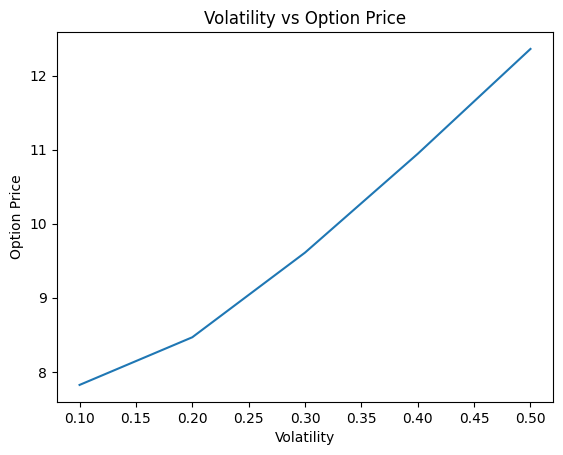

In [34]:
#Plotting the graph for volatility
plt.plot(df_volatality['Volatility Variation'], df_volatality['Variation with volatility'])
plt.xlabel('Volatility')
plt.ylabel('Option Price')
plt.title('Volatility vs Option Price')
plt.show()

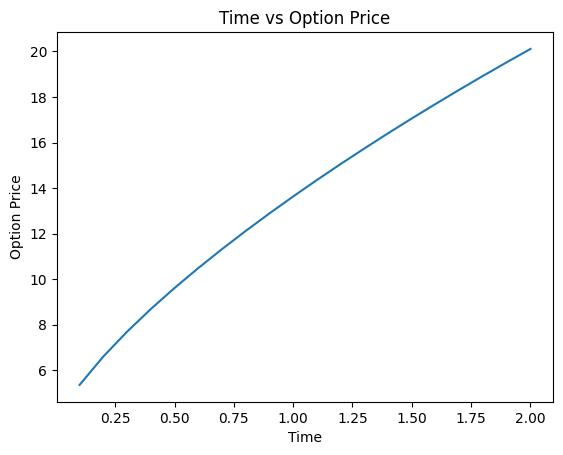

In [35]:
#plotting the graph for time
plt.plot(df_time['Year Variation'], df_time['Value Variations'])
plt.xlabel('Time')
plt.ylabel('Option Price')
plt.title('Time vs Option Price')
plt.show()